### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

- 1. Pregnancies: Number of times pregnant (integer)
- 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
- 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
- 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
- 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
- 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
- 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family    history(float)
- 8. Age: Age in years (integer)
-  9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


### Here’s the dataset link:

- Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

-   [link](https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing)

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

### Ans:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Downloads\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

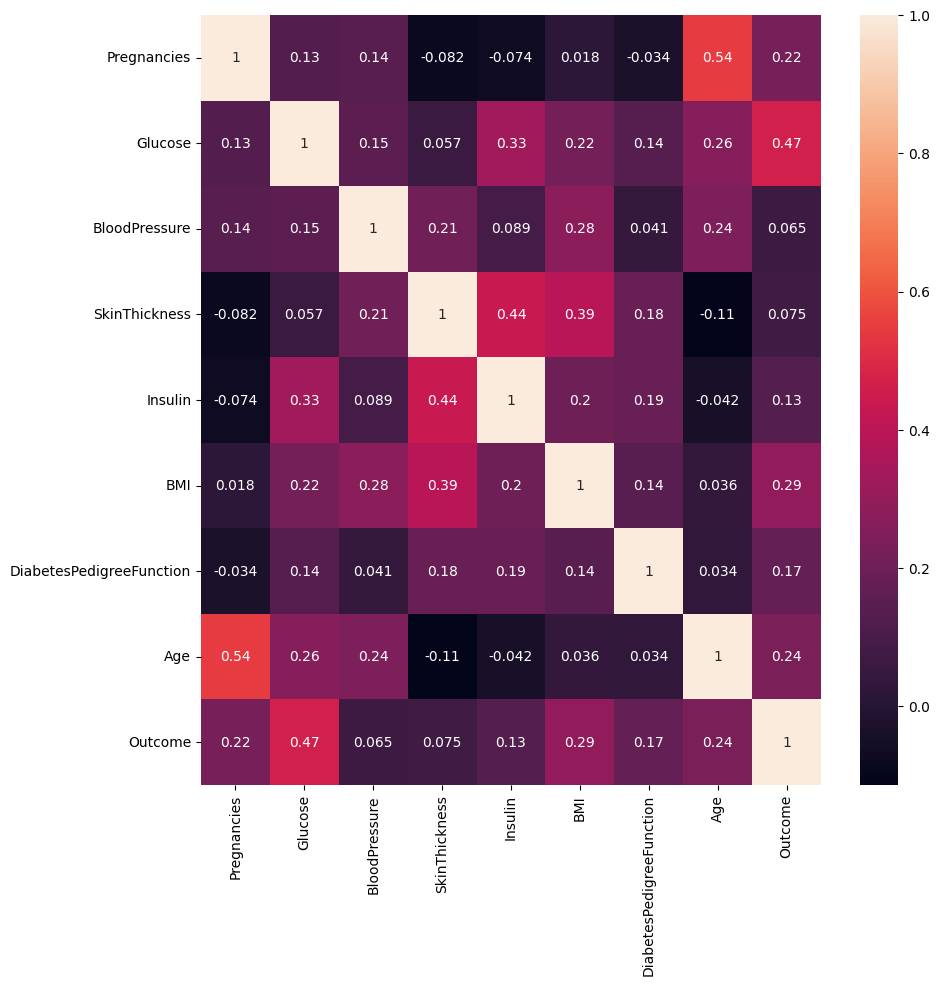

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Count'>

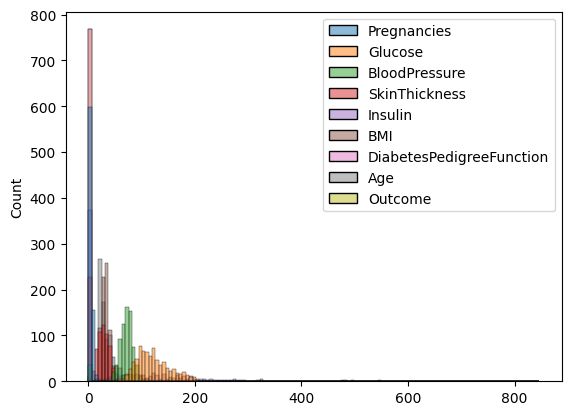

In [9]:
sns.histplot(df)

<Axes: >

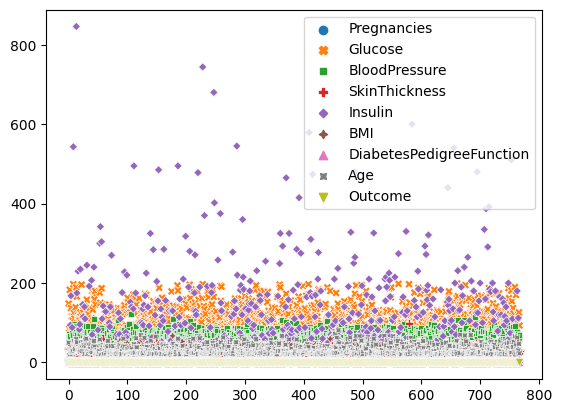

In [14]:
sns.scatterplot(df)

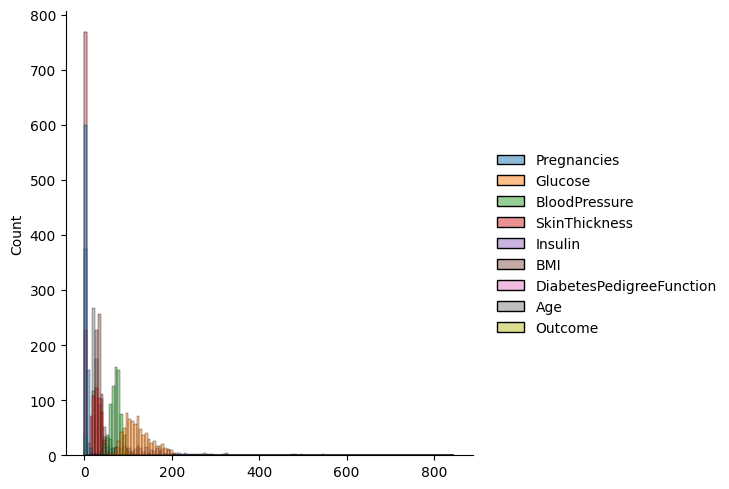

In [16]:
sns.displot(df)

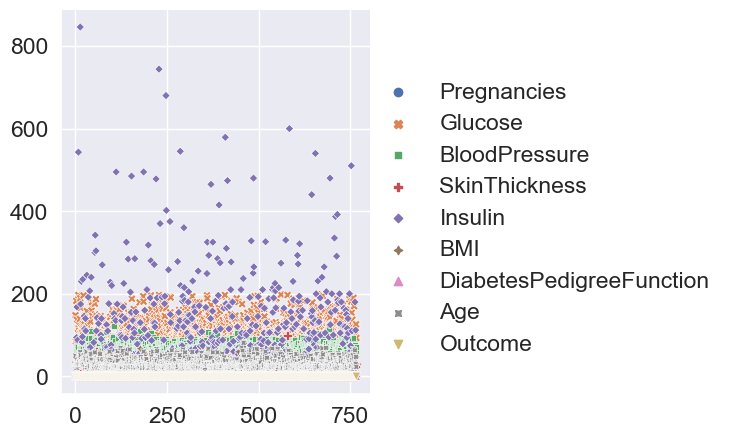

In [46]:
sns.relplot(df)

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

### Ans:

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# checking missing values\

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Note:
- No missing values in this dataset

In [19]:
# Cheaking duplicate values

df.duplicated().sum()

0

### Note:
- In this dataset there is no duplicate values

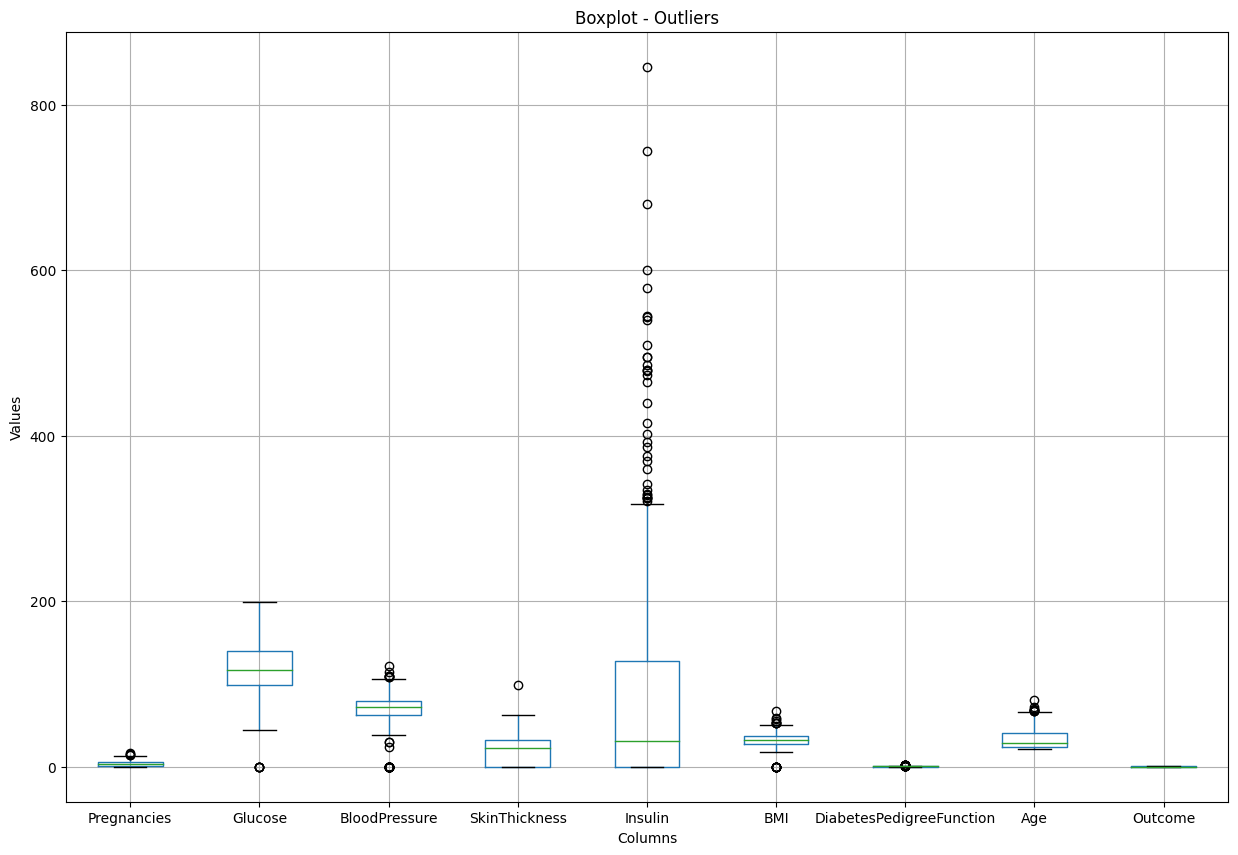

In [20]:
# checking outliers

plt.figure(figsize=(15, 10))
df.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot - Outliers')
plt.show()

In [21]:


from scipy import stats

# Identify and remove outliers using Z-Scores
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = df[filtered_entries]

# Display the original and modified dataset sizes
print("Original dataset size:", df.shape)
print("Dataset size after removing outliers:", data_no_outliers.shape)

Original dataset size: (768, 9)
Dataset size after removing outliers: (688, 9)


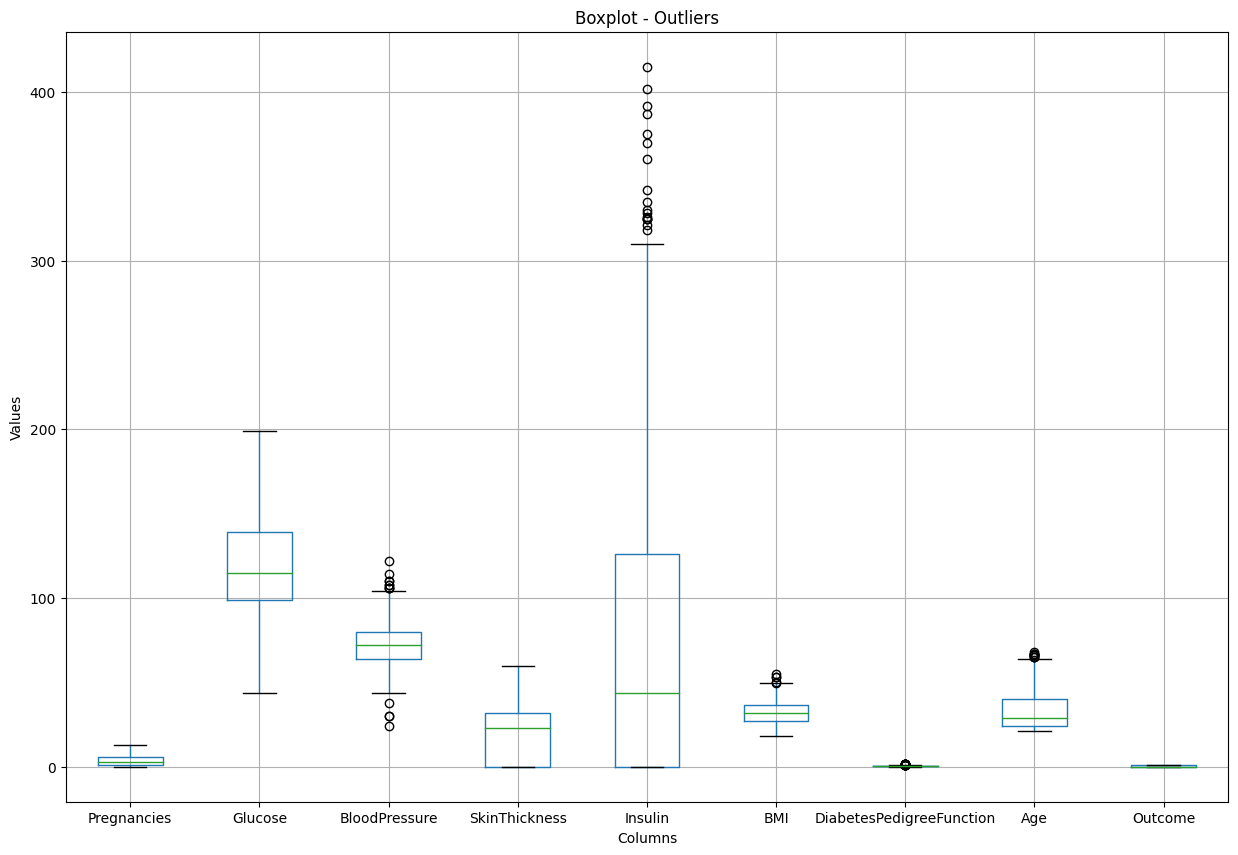

In [22]:
plt.figure(figsize=(15, 10))
data_no_outliers.boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot - Outliers')
plt.show()

- outliers removed

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### There is no categorical data in this dataset

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

### Ans:

In [24]:

X = data_no_outliers.drop('Outcome', axis=1)
y = data_no_outliers['Outcome']

In [25]:
from sklearn.model_selection import train_test_split

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_seed)

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

### Ans:

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

-0.37539740767913865

In [29]:
# parameters

parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [30]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
classifiercv = GridSearchCV(
    classifier, param_grid=parameter, cv=5, scoring='accuracy')

In [31]:
classifiercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
classifiercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
classifiercv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [34]:
y_pred = classifiercv.predict(X_test)

In [35]:
r2_score(y_pred, y_test)

-0.35055532702591496

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

### Ans:

In [36]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.6842105263157895
Precision = 0.5764705882352941
Recall = 0.5764705882352941
F1 Score = 0.5764705882352941


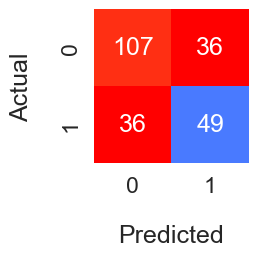

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2, 2))
sns.set(font_scale=1.5)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cbar=False,
    cmap='flag',
    vmax=175
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

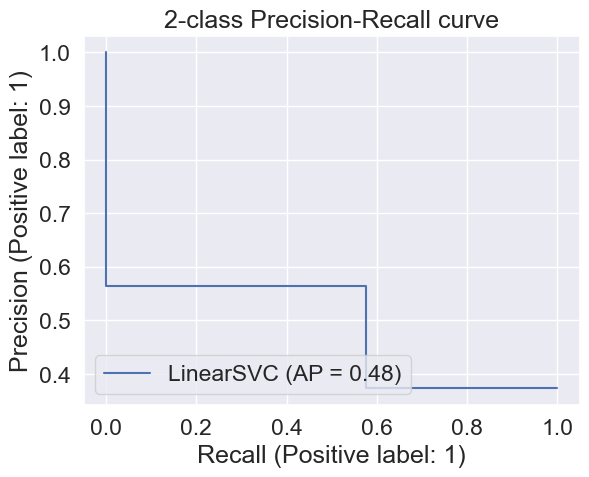

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

### Ans:


[Text(0.3984872611464968, 0.9666666666666667, 'x[1] <= 114.5\ngini = 0.427\nsamples = 460\nvalue = [318, 142]'),
 Text(0.20621019108280256, 0.9, 'x[6] <= 0.661\ngini = 0.221\nsamples = 229\nvalue = [200, 29]'),
 Text(0.10668789808917198, 0.8333333333333334, 'x[7] <= 35.5\ngini = 0.145\nsamples = 190\nvalue = [175, 15]'),
 Text(0.06050955414012739, 0.7666666666666667, 'x[3] <= 23.5\ngini = 0.08\nsamples = 144\nvalue = [138, 6]'),
 Text(0.04777070063694268, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.0732484076433121, 0.7, 'x[0] <= 6.5\ngini = 0.161\nsamples = 68\nvalue = [62, 6]'),
 Text(0.06050955414012739, 0.6333333333333333, 'x[2] <= 51.0\ngini = 0.138\nsamples = 67\nvalue = [62, 5]'),
 Text(0.025477707006369428, 0.5666666666666667, 'x[1] <= 85.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.012738853503184714, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03821656050955414, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09554140127388536, 

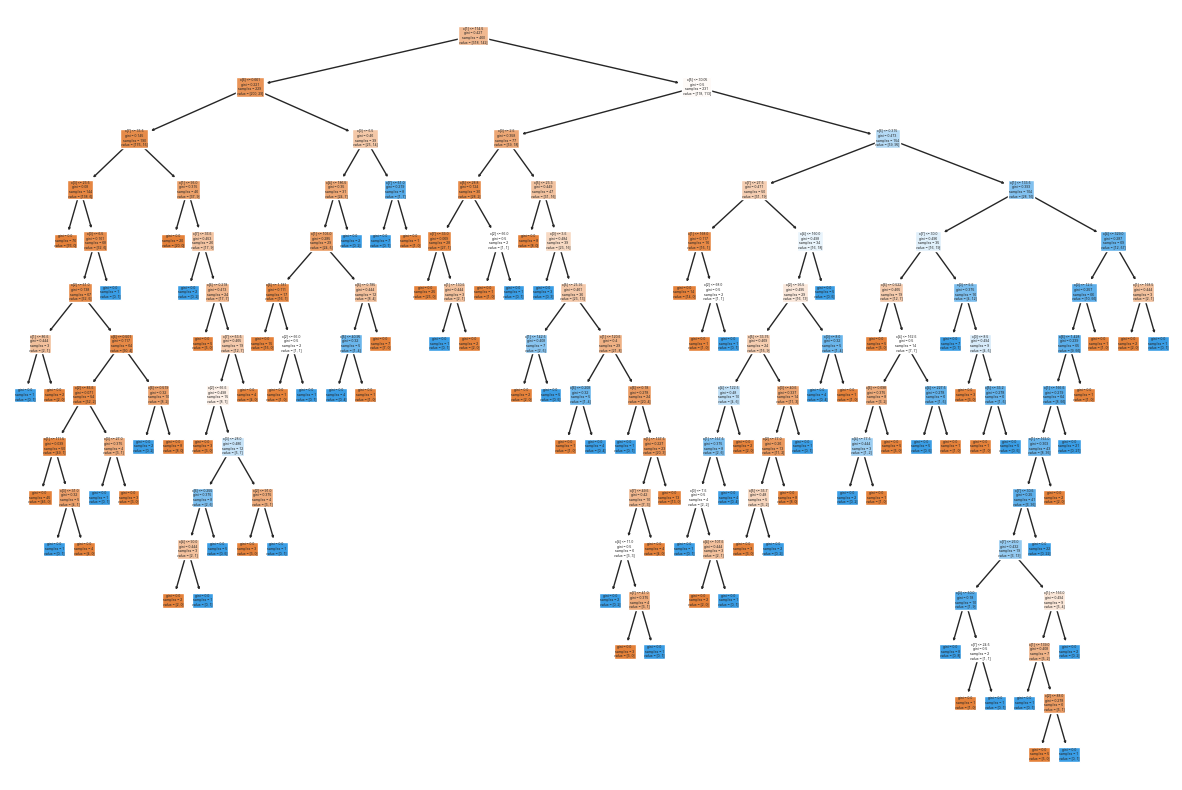

In [39]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, filled=True)

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

### Ans:

- Sensitivity analysis and scenario testing
    - Sensitivity analysis and scenario testing are more sophisticated methods of validating a model.
    - Sensitivity analysis involves identifying the inputs that have the greatest impact on the   model'spredictions.
    -  Scenario testing involves creating different scenarios and seeing how the model's predictions change in each scenario

In [40]:
test_data = pd.DataFrame(data=[[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                               [3, 126, 88, 41, 235, 39.3, 0.704, 27],
                               [6, 148, 72, 35, 0, 26.6, 0.627, 50]])

test_predicted = classifier.predict(test_data)
test_predicted

array([1, 0, 0], dtype=int64)